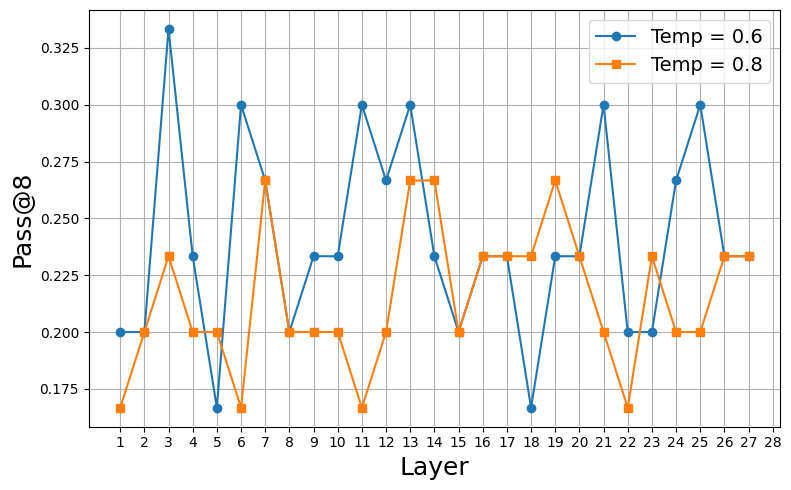

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load CSV
df = pd.read_csv('/home/ly/DataDistillation/results/steering/Qwen2.5-Math-1.5B-Instruct$/aime24/temperature-sampling-fixed-layer/plots/pass_at_k_summary.csv')

# Extract temperature and layer from the label
df['temperature'] = df['label'].apply(lambda x: float(re.search(r'temp([\d.]+)', x).group(1)))
df['layer'] = df['label'].apply(lambda x: int(re.search(r'layer(\d+)', x).group(1)))

# Sort by layer
df = df.sort_values(by='layer').reset_index(drop=True)
df['layer'] = df['layer'] + 1

# Define different markers
markers = ['o', 's', '^', 'v', '*', 'D', 'P', 'X', 'h', '+', 'x']
temps = sorted(df['temperature'].unique())

# Plotting
plt.figure(figsize=(8, 5))

for i, temp in enumerate(temps):
    sub_df = df[df['temperature'] == temp]
    marker = markers[i % len(markers)]  # Loop around if more temps than markers
    plt.plot(sub_df['layer'], sub_df['pass@8'], marker=marker, label=f'Temp = {temp}')

# Formatting
plt.xlabel('Layer', fontsize=18)
plt.ylabel('Pass@8', fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()

yticks = list(range(1, 29))
ytick_labels = [f"{val}" for val in yticks]
plt.xticks(yticks, ytick_labels)

# Save as PDF
plt.savefig('pass_at8_by_layer_by_temp.pdf')
plt.show()
